# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; and
5. Create meaningful visualizations to analyze the data!
---

## Important Dates

- Homework release: Fri 2 Oct 2020
- **Homework due**: Fri 16 Oct 2020, 23:59
- Grade release: Fri 23 Oct 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the `data` folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in either comments or markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.



## Context

The coronavirus pandemic has led to the implementation of unprecedented non-pharmaceutical interventions ranging from case isolation to national lockdowns. These interventions, along with the disease itself, have created massive shifts in people’s lives. For instance, in mid-May 2020, more than one third of the global population was under lockdown, and millions have since lost their jobs or have moved to work-from-home arrangements.


Importantly, the disease has shifted people's [needs](https://en.wikipedia.org/wiki/Toilet_paper), [interests](https://en.wikipedia.org/wiki/TikTok), and [concerns](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Switzerland) across the globe.

In this homework, we will take a deep dive into Wikipedia data and try to uncover what changed with the pandemic. More specifically, we will be focusing on Wikipedia pageviews, that is, how many people read each article on Wikipedia each day.
A nice graphical user interface for playing with Wikipedia pageviews is available [here](https://pageviews.toolforge.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&range=latest-20&pages=Cat|Dog).
Also, the Wikimedia Foundation releases dump files with the number of pageviews per article across all Wikimedia websites, including Wikipedia in all its language editions [(amazing, right?)](https://dumps.wikimedia.org/other/pagecounts-ez/). 

#### But wait, what is a pageview?

> A pageview or page view, abbreviated in business to PV and occasionally called page impression, is a request to load a single HTML file (web page) of an Internet site. On the World Wide Web, a page request would result from a web surfer clicking on a link on another page pointing to the page in question. (Source: [Wikipedia article "Pageviews"](https://en.wikipedia.org/wiki/Pageview))

Pageviews in Wikipedia can tell us that people are looking for certain information online. Analyzing how the volume and the distribution of pageviews changed can tell us about how the behavior of Wikipedia readers has changed.

In this homework, you will take a deep dive into analyzing Wikipedia pageview logs and uncover shifts in interests associated with the current pandemic.

---

## The data

First, you need to download a **meraviglioso** dataset from the Italian Wikipedia that we prepared for you. The structure of the data is described next. 

**The dataset is available in the `data` directory pushed to the same GitHub repo as the homework**. Inside of the data directory, you will find three files:

### `articles.tsv.gz`

This is a tab-separated file containing daily pageviews for a subset of the articles from Italian Wikipedia. It is compressed! Each row corresponds to a different article, and each column (except the first) corresponds to the number of pageviews this article received on a given day. The example below shows the structure for two of the things [Kristina Gligorić](https://kristinagligoric.github.io/), one of your TAs, likes the most on her Pizza:

**Example:**
~~~
index       2018-01-01 00:00:00    2018-01-02 00:00:00 (...)
Formaggio   100                    101                 (...)
Ananas      12                     54                  (...)
(...)       (...)                  (...)
~~~


### `topics.jsonl.gz`

This is a classification of which topics an article belongs to, according to a model released by the Wikimedia Foundation (the classes are derived from this [taxonomy](https://www.mediawiki.org/wiki/ORES/Articletopic)). Importantly, this file was obtained from English Wikipedia, while the previous one contains articles from the Italian Wikipedia. This is important because article titles in the Italian Wikipedia are in Italian, while article titles in the English page are in English (duh!). In any case, each line contains a .json object with
the English name of the article (name);
1. the English name of the article (`name`);
2. a set of fields related to topics themselves. Each of these fields is set as either `True` (if the article belongs to this topic) or `False` (if it does not). Notice that the same article may belong to multiple topics. 

**Example:**
~~~
{"index": "Cheese", "Culture.Food and drink": True, "Culture.Literature": False (...)}
{"index": "Pineapple", "Culture.Food and drink": True, "Culture.Literature": False (...)}
(...)
~~~

 
### `mapping.pickle`

This is a `.pickle` file, that is, a serialized Python object. You can read about Python pickles  [here](https://wiki.python.org/moin/UsingPickle), 
but in short: the default Python library `pickle` allows you to save and load Python objects to and from disk. This is one object saved via the pickle library: a Python dictionary containing a mapping between the English names and the Italian names of Wikipedia articles:

**Example:**
~~~
{
    "Cheese": "Formaggio",
    "Ananas": "Pineapple"
    (...)
}
~~~
---


## _Step 1:_ Loading the data

---
### **Task 1**

Your first task is to load all these datasets into memory using pandas and pickle. 
**You should load the files compressed.**

Here, the files at hand are rather small, and you could easily uncompress  the files to disk and work with them as plain text. 
Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, this will often not be the case.

Then, working with compressed files is key so that you don't receive e-mail from your (often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your datasets. 
Another big advantage of compressing files is to simply read files faster. You will often find that reading compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading and writing to the disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

 
---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). Check the `error_bad_lines` parameter on `read_csv`.

In [1]:
import pandas as pd
import pickle

### ~ 1.1

mapping = pd.read_pickle("data/mapping.pickle") # returns a dict
topics = pd.read_json("data/topics.jsonl.gz", lines=True)
articles = pd.read_csv("data/articles.tsv.gz", error_bad_lines = False, sep='\t')

b'Skipping line 7: expected 944 fields, saw 945\n'


In [2]:
articles.head()

,index,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
0,Khulna,0,2,1,0,0,2,0,2,0,...,0,1,1,0,1,1,0,2,1,2
1,Karim_Ansarifard,1,5,1,1,1,3,6,4,5,...,2,2,0,1,2,0,1,0,0,0
2,Poldhu,0,0,1,1,0,1,0,2,2,...,0,2,2,0,0,0,2,1,2,1
3,Alice_(The_Sisters_of_Mercy),0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Palmyra,1,4,0,0,0,2,11,2,0,...,0,0,1,0,0,0,1,0,0,0


In [3]:
topics.head()

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,...,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia
0,Chinese_food_therapy,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,Battle_of_Naissus,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Battle_of_Stoke_Field,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,Smooth_newt,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Vicente_Aleixandre,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## _Step 2:_ Filtering the data

---
### **Task 2**

Oh no! Something seems wrong with your dataframe!
It seems that some of the lines in the `articles.tsv.gz` are weird! 
They have titles in the format `"Discussione:name_of_the_page"`.

Unsure of what they mean, you ask about them in the [Wiki-research mailing list](https://lists.wikimedia.org/mailman/listinfo/wiki-research-l).
Twenty minutes later a kind internet stranger comes with an answer! 
She tells you that these are talk pages, where people discussing what should and should not be in the article (in fact it can be pretty funny to read, eg, [you can read Italians debating about pizza](https://it.wikipedia.org/wiki/Discussione:Pizza))

After understanding what they are, your task is now to filter these lines using `pandas`! After all, we are interested in pageviews going towards articles! Not discussion pages!

---

**Hint**: There is one of them in the position \#180 of the dataframe, if you want to check it!

To eliminate the discussion row, we first search for all the row indices which does not contain the string 'Discussione' and slice the original dataframe with those indices. 

In [4]:
### ~ 2.1

# print the 180th row of the dataframe
print('The key of the 180th row of the dataframe before filtering is  : {0}'.format( articles.iloc[180,0]))

#Creating a boolean mask to remove index entries that starts with "Discussione:"
articles_mask = articles['index'].apply(lambda x: not x.startswith('Discussione:'))
articles_filtered = articles[articles_mask]

# print the 180th row of the dataframe
print('The key of the 180th row of the dataframe  after filtering is : {0}'.format( articles_filtered.iloc[180,0]))

#Verifying that it has been properly filtered
print('The number of articles unfiltered is : {0}'.format( len(articles)))
print('The number of articles after filtering is : {0}'.format( len(articles_filtered)))
print('The number of articles removed with the filter is : {0}'.format(len(articles)- len(articles_filtered)))

#renaming to have an easier time later.
articles = articles_filtered

The key of the 180th row of the dataframe before filtering is  : Discussione:Jitter
The key of the 180th row of the dataframe  after filtering is : Allsvenskan_1997
The number of articles unfiltered is : 56791
The number of articles after filtering is : 55791
The number of articles removed with the filter is : 1000


We can see that after filtering we removed the line containing "Discussione:Jitter" and that in total we removed a thousand lines corresponding to the "Discussione:name_of_the_page"

## *Step 3*: Understanding the data

---
### **Task 3.1**
Data cleaning is hard huh? But now that this headache is behind us we can go on to explore our data.

Let's begin with some basic stats. It is always important to do this as a sanity check.

You should:

1. Start by calculating how many topics and articles there are. Also, while you are at it, print the names of the topics to get a grasp of what they are about. 
2. Calculate the average daily number of pageviews in the dataset.
3. **Discuss:** As previously mentioned, your data is a sample of _some_ (and not all) Wikipedia articles! Estimate (roughly) what percentage of Italian Wikipedia articles are in your dataset comparing your daily average pageview numbers with the official statistics (which can be found [here](https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2020-01-01&end=2020-09-21&sites=it.wikipedia.org)). Notice that we are focusing on the desktop version of Wikipedia.

---
**Hint**: topics are in the columns of the topic file!

In [5]:
### ~ 3.1.1

# print the number of articles and topics  which correspond to the index of the articles dataframe and the columns of the
# topics dataframe respectively
print('There are : {0} different articles'.format(len(articles)))
print('There are : {0} different topics'.format(len(topics.columns[1:])))
# print the columns name of the topics dataframe which correspond to the different topics
print('Lists of topics: ')
for i,name in enumerate(topics.columns.values):
    if i>0 : 
        print('{0}) {1}'.format(i,name))

There are : 55791 different articles
There are : 64 different topics
Lists of topics: 
1) Geography.Regions.Asia.Central Asia
2) Geography.Regions.Europe.Eastern Europe
3) History and Society.Military and warfare
4) Culture.Media.Television
5) History and Society.Education
6) Culture.Media.Books
7) Geography.Regions.Africa.Africa*
8) Culture.Visual arts.Architecture
9) Culture.Biography.Women
10) Geography.Regions.Americas.North America
11) STEM.STEM*
12) Culture.Performing arts
13) Culture.Literature
14) History and Society.Politics and government
15) Geography.Regions.Africa.Northern Africa
16) STEM.Earth and environment
17) Geography.Regions.Africa.Central Africa
18) STEM.Medicine & Health
19) STEM.Libraries & Information
20) Geography.Regions.Europe.Europe*
21) Geography.Regions.Europe.Western Europe
22) Culture.Media.Radio
23) STEM.Space
24) Culture.Visual arts.Comics and Anime
25) STEM.Technology
26) Culture.Internet culture
27) Culture.Media.Software
28) Geography.Regions.Asia.E

To compute the average daily number of pageviews, we first sum over each articles for a day (daily count) and then take the mean over the daily count of pageviews.

In [6]:
### ~ 3.1.2

# sum views over the articles for each day
daily_count = articles.drop('index',1).sum()

# average the daily count to get the daily average number of views
daily_avg = daily_count.mean()

# sum over the the daily count to get the total number of views
total_count = daily_count.sum() 

print('Average daily number of pageviews = {:0.3f}'.format(daily_avg))

### ~ 3.1.3

print('Fraction of count over total count {:0.3f}%'.format((total_count/5405263393)*100))
print('Fraction of our dataset daily count over the total italian Wikipedia daily count: {:0.3f}%'.format((daily_avg/5731987)*100))
print('Fraction of articles from our dataset over the total article from italian Wikipedia: {:0.3f}%'.format((len(articles)/1641741)*100))

Average daily number of pageviews = 324267.671
Fraction of count over total count 5.657%
Fraction of our dataset daily count over the total italian Wikipedia daily count: 5.657%
Fraction of articles from our dataset over the total article from italian Wikipedia: 3.398%


### 3.1.3  -  Text Answer
From the pageviews website (see cell above), on a period of 2018-01-01 to 2020-07-31, a total of 5,405,263,393 pageviews has been counted,
with a daily average of 5,731,987. Comparing this with the results obtained from the previous point (3.1.2), 
the total count from the articles (filtered) corresponds to **5.657% of all total pageviews**, 
while the daily average also makes up roughly the same **percentage (5.657%)**. However, the official number of articles in the Italian wikipedia for this period is 1,641,741 articles and comparing to the number of articles in our dataframe  gives us  **3.398% of all total articles**. This difference with pageviews can be explained by the fact that we only work on a sample of articles. Indeed, each articles has his own number of pageviews and our sample contains articles that in averages has more pageviews than the global average of pageviews.

In [7]:
from IPython.display import IFrame
IFrame('https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2018-01-01&end=2020-07-31&sites=it.wikipedia.org',
       width=800,height=600)


### **Task 3.2**

Now that we have a better understanding of the data, let's look at some articles to get a feeling of what is happening. 

Your task is to:

1. Find all articles whose names contain the sequence of characters `"virus"` (case insensitive) and that received least 7,000 pageviews across the entire period (no point in zooming on very insignificant articles);
2. Find a way to nicely visualize __each__ one of the time-series (in a single plot, which may have multiple panels; in the lecture, Bob referred to these as “small multiples); Your visualization should allow one to see overall trends across each of the different articles and depict the overall trends, with the least noise possible. Additionally, highlight two specific dates in your plot: 31 January ([first case reported in Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#First_confirmed_cases)) and 21 February ([when multiple cases were confirmed in northern Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#Clusters_in_northern_Italy)).
4. **Discuss**: What did you observe? Did all the articles behave similarly?

---

**Hint**: The column dates are currently strings which are not very plot friendly. You can turn them into datetime objects using: 

~~~python
your_dataframe_name.columns = pd.to_datetime(your_dataframe_name.columns)
~~~

Notice that this only works if you have only date-related columns. Fortunately, if you get rid of the `index` column by making it a real pandas index, things should work just fine.

**Hint**: Choose your axes wisely!



In order to select articles with the keyword <virus>, we first get the indices of the rows containing the keyword and slice the dataframe with them. Then, we select the remaining articles with more than 7,000 pageviews during the whole period.

In [8]:
### ~ 3.2.1

articles.set_index('index', inplace=True) #setting the column 'index' as index of dataframe
articles.columns = pd.to_datetime(articles.columns) #columns name in datetime format (useful for plot later)

# Filtering the dataset keeping articles containing word 'virus' (case insensitive) and having a total of pageviews > 7000 across the entire period
articles_virus = articles[articles.index.str.contains("virus",case=False)][articles.sum(1)>=7000]

# Show result 
articles_virus

<ipython-input-8-bafa33789e90>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  articles_virus = articles[articles.index.str.contains("virus",case=False)][articles.sum(1)>=7000]


,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31
index,,,,,,,,,,,,,,,,,,,,,
Virus_della_leucemia_felina,11,27,20,28,24,9,13,36,30,34,...,13,12,13,9,6,10,11,7,7,8
Malattia_da_virus_Ebola,3,21,13,23,28,5,11,11,17,18,...,142,30,25,126,30,27,147,25,39,146
Influenzavirus_A_sottotipo_H1N1,20,23,49,52,46,108,271,143,75,60,...,37,27,30,70,36,39,39,35,35,44
Rhinovirus,6,9,12,22,13,12,21,18,19,15,...,8,10,10,13,6,14,10,8,9,14
Virus_(informatica),26,70,74,66,86,44,67,94,107,168,...,21,38,21,18,30,24,33,28,22,17
Herpesvirus_umano_3,2,5,5,14,6,13,9,12,11,5,...,10,9,10,5,7,8,13,5,9,8
Antivirus,19,31,26,27,42,30,24,54,45,80,...,16,33,25,14,14,19,23,23,22,12
Virus_respiratorio_sinciziale_umano,6,11,18,18,15,14,9,21,17,19,...,11,10,10,4,4,9,4,12,5,7


We first try to plot each of the eight time series on linear scale and visualize them.

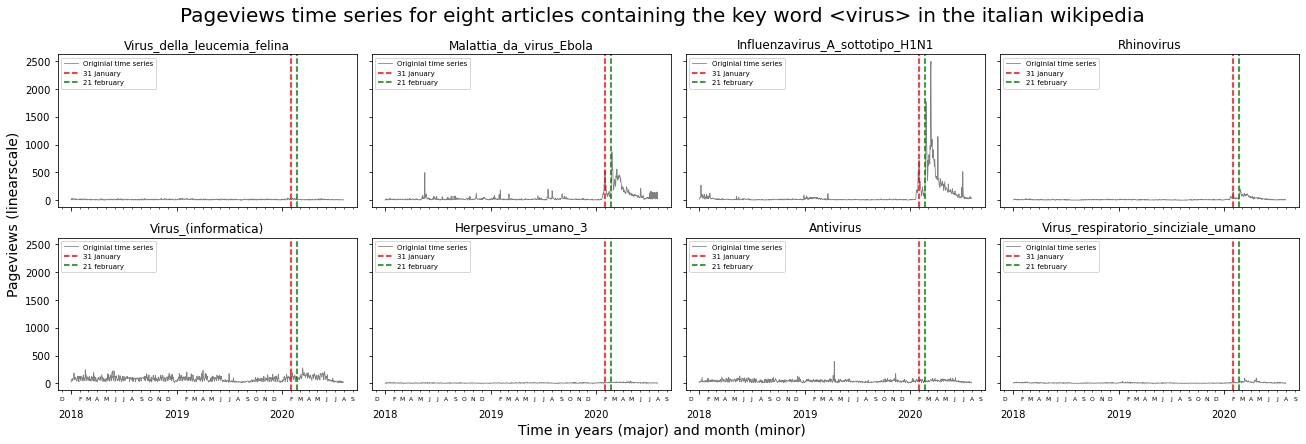

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, YearLocator
from matplotlib.ticker import FuncFormatter

### ~ 3.2.2

### plot the raw time series

## format the month thick with first letter
month_fmt = DateFormatter('%b')
def m_fmt(x, pos=None):
    return month_fmt(x)[0]

fig, axes = plt.subplots(nrows = 2, ncols= 4,figsize=(18,6),sharex=True, sharey=True)

for ax,art in zip(axes.flat,articles_virus.index):
    ax.plot(articles_virus.columns, articles_virus.loc[art],color='gray', linewidth=0.8, label = 'Originial time series')
    months = MonthLocator() 
    years = YearLocator(month=1, day=1)
    yrsFmt = DateFormatter("\n%Y")
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(FuncFormatter(m_fmt))
    for tick in ax.xaxis.get_minor_ticks():
        tick.label.set_fontsize(6) 
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yrsFmt)
    ax.tick_params(axis='x',labelrotation=0)
    ax.axvline('2020-01-31', linestyle='--', color='red',label='31 january')
    ax.axvline('2020-02-21', linestyle='--', color='green',label='21 february')
    ax.legend(loc="upper left",fontsize=7.0)
    ax.set_title(art)
    
fig.text(0.5,0, "Time in years (major) and month (minor)", fontsize=14, ha='center', va='center')
fig.text(0,0.5,"Pageviews (linearscale)", fontsize=14, ha='center', va='center', rotation='vertical')
fig.suptitle("Pageviews time series for eight articles containing the key word <virus> in the italian wikipedia",fontsize = 20)
fig.tight_layout()

 We observe that some of the the time series contain sharp peaks, which correspond to a fast increase in pageviews. Such pattern can be better visualized on logscale, because linear scale pushes down values that are significantly higher than the previous value, but significantly lower than the peak value. Therefore, we plot each of the time series on a y-logscale in the next plot.

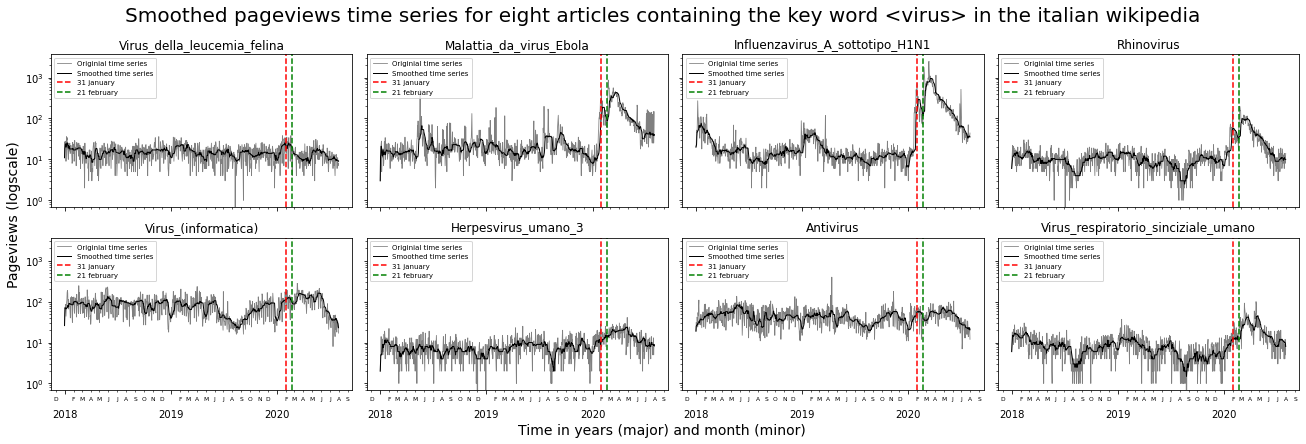

In [10]:
### ~ 3.2.2

## smooth the time series with a median filter over 14 days
articles_virus_smoothed = articles_virus.rolling(14,min_periods=1,axis = 1).median(axis = 1)

### plot the time series

## format the month thick with first letter
month_fmt = DateFormatter('%b')
def m_fmt(x, pos=None):
    return month_fmt(x)[0]

fig, axes = plt.subplots(nrows = 2, ncols= 4,figsize=(18,6),sharex=True, sharey=True)

for ax,art in zip(axes.flat,articles_virus_smoothed.index):
    ax.semilogy(articles_virus.columns, articles_virus.loc[art],color='gray', linewidth=0.8, label = 'Originial time series')
    ax.semilogy(articles_virus_smoothed.columns, articles_virus_smoothed.loc[art],color='black', linewidth=1.0,label='Smoothed time series')
    months = MonthLocator() 
    years = YearLocator(month=1, day=1)
    yrsFmt = DateFormatter("\n%Y") # correct year descriptor
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(FuncFormatter(m_fmt))
    for tick in ax.xaxis.get_minor_ticks():
        tick.label.set_fontsize(6) 
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yrsFmt)
    ax.tick_params(axis='x',labelrotation=0)
    ax.axvline('2020-01-31', linestyle='--', color='red',label='31 january')
    ax.axvline('2020-02-21', linestyle='--', color='green',label='21 february')
    ax.legend(loc="upper left",fontsize=7.0)
    ax.set_title(art)
    
fig.text(0.5,0, "Time in years (major) and month (minor)", fontsize=14, ha='center', va='center')
fig.text(0,0.5,"Pageviews (logscale)", fontsize=14, ha='center', va='center', rotation='vertical')
fig.suptitle("Smoothed pageviews time series for eight articles containing the key word <virus> in the italian wikipedia",fontsize = 20)
fig.tight_layout()

After plotting the time series on y-logscale, we observe that they contain a significant level of noise (fast variations). As a consequence, we decide to smooth the time series to observe the overall trend in the noise. To do that, we decides to apply a rectangular window filter on the signal (inspired from low-pass filter in signal processing) and we choose to apply a median filter on the past fourteen days value (including the one we estimate), because it is more robust than the mean filter. In our case the .rolling().median() function allows us to do that and we already included those in the above plot (bold black line). 

In [11]:
# choose dates
january24 = '2020-01-24' 
february28 ='2020-02-28'

# compute the relative increase between the two dates for each time series
for art in articles_virus_smoothed.index:
    print(f"{art} :")
    print("Relative increase in percentage of pageviews between january 24  and february 28 in 2020 : {:.2%}"
      .format((articles_virus_smoothed[february28][art]-articles_virus_smoothed[january24][art])/(articles_virus_smoothed[january24][art])))

Virus_della_leucemia_felina :
Relative increase in percentage of pageviews between january 24  and february 28 in 2020 : -39.13%
Malattia_da_virus_Ebola :
Relative increase in percentage of pageviews between january 24  and february 28 in 2020 : 1253.85%
Influenzavirus_A_sottotipo_H1N1 :
Relative increase in percentage of pageviews between january 24  and february 28 in 2020 : 2637.14%
Rhinovirus :
Relative increase in percentage of pageviews between january 24  and february 28 in 2020 : 333.33%
Virus_(informatica) :
Relative increase in percentage of pageviews between january 24  and february 28 in 2020 : -16.59%
Herpesvirus_umano_3 :
Relative increase in percentage of pageviews between january 24  and february 28 in 2020 : 25.00%
Antivirus :
Relative increase in percentage of pageviews between january 24  and february 28 in 2020 : -22.22%
Virus_respiratorio_sinciziale_umano :
Relative increase in percentage of pageviews between january 24  and february 28 in 2020 : 129.41%


### 3.2.3  -  Text Answer
In this analyis, we are not considering aggregate of time series and the underlying random process with it , but rather one exact time series. Therefore, to analyze the the change in pageviews for each article, we decide to compute the relative increase in pageviews on the smooth time series between the 24 of january (one week before the first case confirmed)  and the 28 of february ( one week after multiple cases confirmed) to be sure to inlcude the peak if there is one.
Some articles seemed to show a noticeable jump following the two key dates, namely articles for Ebola, H1N1, HRSV (Respiratory syncytial virus) and Rhinovirus with a relative increase of 1253.85%, 2637.14%, 129.41% and 333.33% respectively. Those viruses share the particularity that there were either recent outbreaks of interest (Ebola, H1N1) or they are viruses that affect the respiratory tract (HRSV, Rhinovirus, H1N1). Other viruses do not exhibit any of these characteristics and did not have a sudden jump in interest on the aforementioned dates.


### **Task 3.3**

Before we move on, let's make a final sanity check and analyze the distribution of pageviews over all articles in our dataset. You are given a function to calculate the **cumulative distribution function** (CDF) of a sample. The CDF is a function f(x) associated with a data sample. For each value x, f(x) represents the percentage of elements in your sample that have values smaller or equal to x (read more about it [here](https://en.wikipedia.org/wiki/Empirical_distribution_function)).
Your task is to:

1. Calculate the CDF of the distribution of pageviews across all days over articles. That is, a) calculate the total number of pageviews each article has received and then, b) calculate the CDF for these values.


2. Now plot this function using different scales for the x- and y-axis. You should plot it in 4 different ways:

    a. x-axis on linear scale, y-axis on linear scale
    
    b. x-axis on log scale, y-axis on linear scale
    
    c. x-axis on linear scale, y-axis on log scale
    
    d. x-axis on log scale, y-axis on log scale
    
3. **Discuss:** There is a pretty odd fact about the distribution of our data! Can you spot it and describe it? Which of the different plots (a-d) allows you to find this oddity? Why isn't this visible in the other plots?

---

**Hint:** You can use `plt.xscale` and `plt.yscale`.

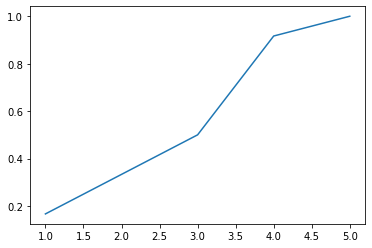

In [12]:
# This function is being given to you with a usage example :)! Make good use!

import numpy as np

def get_cdf(vals):
    # Input:
    # -- vals: an np.array of positive integers
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals);
    # -- y: an array containing the (empirically calculated) probability that vals <= x
    
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    y = y
    x = list(range(1, max(vals) + 1))
    return x, y  

vals = np.array([1,2,3,4,1,2,4,3,4,4,5,4])
x, y = get_cdf(vals)
plt.plot(x, y)
plt.show()

We first get the total number of pageviews per articles over the entire period and compute the corresponding cdf using the get_cdf function provided.

In [13]:
### ~ 3.3.1

# sum over days for each articles
total_views = articles.sum(1)

# compute the cdf
cdf_x, cdf_y = get_cdf(total_views.values)

Using the arrays returned by get_cdf, we plot four different cdf using combination of linear and log scale.

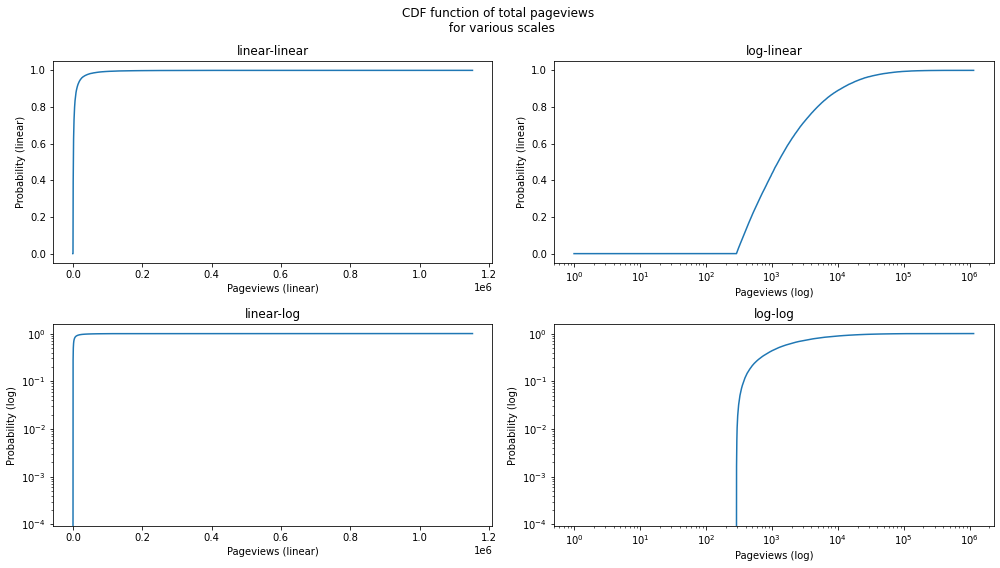

In [14]:
### ~ 3.3.2

# Creating a 2x2 subplots to have each of the axis variations
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14,8))
fig.suptitle("CDF function of total pageviews \n for various scales")

#a) 
ax = axes.flat[0]
ax.plot(cdf_x, cdf_y)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_title('linear-linear')
ax.set_xlabel('Pageviews (linear)')
ax.set_ylabel('Probability (linear)')

#b)
ax = axes.flat[1]
ax.plot(cdf_x, cdf_y)
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_title('log-linear')
ax.set_xlabel('Pageviews (log)')
ax.set_ylabel('Probability (linear)')

#c)
ax = axes.flat[2]
ax.plot(cdf_x, cdf_y)
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title('linear-log')
ax.set_xlabel('Pageviews (linear)')
ax.set_ylabel('Probability (log)')

#d)
ax = axes.flat[3]
ax.plot(cdf_x, cdf_y)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('log-log')
ax.set_xlabel('Pageviews (log)')
ax.set_ylabel('Probability (log)');
fig.tight_layout()

### 3.3.3  -  Text Answer

The CDF of the distribution of pageviews across all days over articles seems to be exponentially distributed from the linear-linear plot. Due to the  linear axis, it seems to be exponantially distirubuted from zero. However, there is a minimum of pageviews (around 300) afterwhat the fraction of articles increases in an exponential way with pageviews (it is somehow shifted to the right). We can particularly see that when looking a graph b (x-log / x-lin). 

## *Step 4*: Analyzing Overall Pageview Volume


---
### **Task 4.1**

So far we have seen anecdotal examples. Now let’s move to the big picture! How did Wikipedia pageviews change in general? To gain a better understanding of how Wikipedia’s overall pageview volume has changed during the pandemic, you should do the following:

1. Calculate and visualize the pageviews trends across summed across **all** articles in Italian Wikipedia for the year 2020. (and only for 2020!). 
2. **Discuss**: what regular pattern (something that repeats over and over) do you see in the data?
3. Pre-process the data to remove this regular pattern and make the overall trend clearer. Repeat the plot with the processed data.

---

**Hint**: A convenient way to use `.groupby` alongside dates is to use the [`pd.Grouper`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html) class. Basically, it allows you to group by date periods given frequencies determined by the parameter `freq`. To read how to specify different types of frequencies, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). Recall that, in order to turn an index, column index -- or pretty much anything -- into a timestamp, you can use  [`pd.to_timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_timestamp.html).

After computing the sum of all pageviews across all articles and selecting values for 2020, we plot the time series on a linear scale on both x and y axis.

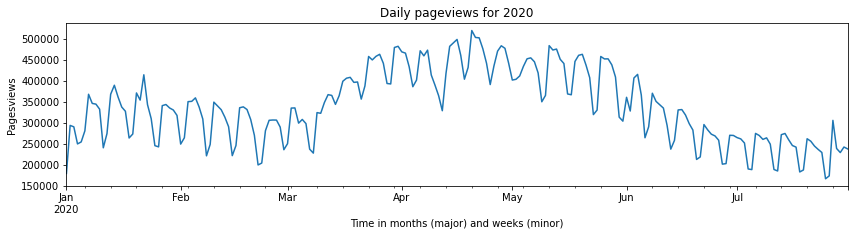

In [15]:
### ~ 4.1.1

# Filtering articles for the year 2020
articles2020 = articles.drop(articles.columns[articles.columns.year != 2020], axis = 1).copy()

# plotting
plt.figure(figsize=(14,3))
articles2020.sum().plot() #plot the daily sum across all articles
plt.xlabel('Time in months (major) and weeks (minor)')
plt.ylabel('Pagesviews')
plt.title('Daily pageviews for 2020');

### 4.1.2  -  Text Answer

At the end of each week, there is a drop in pageviews. This periodic pattern can be fixed by either summing or averaging views over each week.

We first summed pageviews on a weekly basis and then summed over the articles for each week by using the pd.Grouper with a weekly frequency.

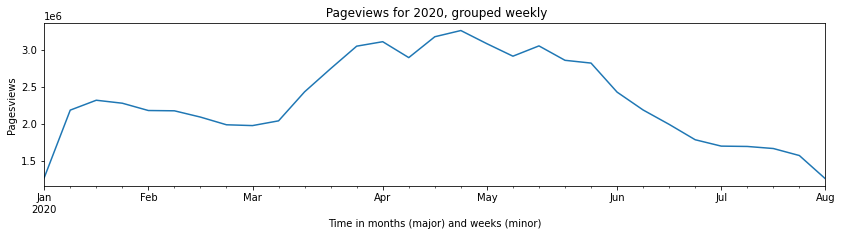

In [16]:
plt.figure(figsize=(14,3))
### ~ 4.1.3

# Articles grouped by weeks and summmed acrosss all articles
articles2020.T.groupby(pd.Grouper(freq='W')).sum().sum(1).plot()
plt.xlabel('Time in months (major) and weeks (minor)')
plt.ylabel('Pagesviews')
plt.title(' Pageviews for 2020, grouped weekly');

### **Task 4.2**

To get an even clearer picture, your task now is to compare the pageview time series of the current year (2020) with the time series of the previous year (2019).

1. Make a visualization where the two years are somehow "aligned", that is, where it is possible to compare the same time of year across the two years. Additionally, your visualization should highlight the date on which the nationwide lockdown started in Italy, 9 March 2020. Preprocess each one of the time series (for each year) the same way you did in Task 4.1.

3. **Discuss:** What changed from 2019 to 2020? Form and justify hypotheses about  the reasons behind this change.

---

**Hint**: In order to use two different y-axes in the same plot, you can use plt.twiny() or ax.twinx() (the latter if you are using the subplots environment;  [See this example](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/two_scales.html)).

We repeated the same procedure as in the previous step for 2019. However, the data is available for 2020 unitil the end of july, as a consequence we choose to select 2019 values up to the 31 july to align both time series.

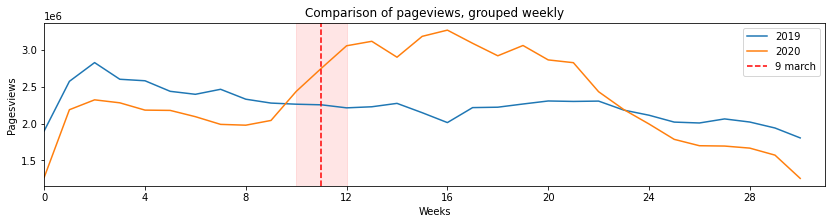

In [17]:
import datetime
plt.figure(figsize=(14,3)) # change this if needed

### ~ 4.2.1 
#This plot stops in August as was the data available to us for 2020.

# As before filtering of data for given periods and smoothing by summing across weeks
articles2019 = articles_filtered.drop(articles_filtered.columns[articles_filtered.columns.year != 2019], 1)
y2020 = articles2020.T.groupby(pd.Grouper(freq='W')).sum().sum(1).values
y2019 = articles2019.T.groupby(pd.Grouper(freq='W')).sum().sum(1).values[:y2020.shape[0]]
x = np.arange(0,y2020.shape[0],1) #number of weeks

# Plot
plt.plot(x,y2019, label='2019')
plt.plot(x,y2020, label='2020')
plt.xlim(0,y2020.shape[0])

#labels for x axis
tick_locs = [i for i in range(0,y2020.shape[0],4)]
tick_labs = [i for i in range(0,y2020.shape[0],4)]
plt.xticks(tick_locs, tick_labs, rotation=0)

#Getting the date, as well as a range of one week before and after the start of quarantine
date = datetime.date(2020, 3, 9) #march 9th
week_number = date.isocalendar()[1]
rmin = date - pd.Timedelta(1, unit='W');
rmax = date + pd.Timedelta(1, unit='W');
rmin = rmin.isocalendar()[1]
rmax = rmax.isocalendar()[1]
plt.axvline(x=week_number, color='r', linestyle='--', label ='9 march')
plt.axvspan(xmin=rmin, xmax=rmax, alpha=0.1, color='red')
plt.legend(loc='upper right')
plt.xlabel('Weeks')
plt.ylabel('Pagesviews')
plt.title('Comparison of pageviews, grouped weekly');

In [18]:
print("Relative increase in percentage of pageviews between week {} and week {} in 2020 : {:.2%}"
      .format(rmax,rmin,((y2020[rmax]-y2020[rmin])/y2020[rmin])))
print("Relative increase in percentage of pageviews between week {} and week {} in 2019 : {:.2%}"
      .format(rmax,rmin,((y2019[rmax]-y2019[rmin])/y2019[rmin])))

Relative increase in percentage of pageviews between week 12 and week 10 in 2020 : 25.45%
Relative increase in percentage of pageviews between week 12 and week 10 in 2019 : -2.19%


### 4.2.2  -  Text Answer
When aligned, there seems to be a significant relative increase in pageviews around March 9th for the year 2020. The span in red highlights one week before and after March 9th. In 2019, the pageviews were steady across this two week period with a decrease of 2%, whereas there was a relative increase of 25% in pageviews for the same period in 2020. This relative increase in wikipedia pageview may simply reflect the overall increase in all webpages activity due to quarantine, people  who are normally active and outside are stuck at home and likely spend more time on their computer. They may get bored and start browsing more while people who normally work/study on computers stays approximately to the same level of activity.




## *Step 5*: Fiddling with Topics

---
### **Task 5.1**

We now turn to a different question: what topics were impacted by the lockdown? 
To start unpacking this question, your task now is to aggregate, for each day, all pageviews that went to each one of the 64 topics. 

There are multiple ways to do this, but for the sake of this exercise, you must create a dataframe where each row contains the number of pageviews a topic obtained on a given day! Example:

~~~
index       date                   views             
TOPIC1      2019-01-01             101              
TOPIC1      2019-01-02             151             
(...)       (...)                  (...)
TOPICK      2019-01-01             1010              
TOPICK      2019-01-02             2123            
(...)       (...)                  (...)
~~~

---

**Hint**: You've should find a way to make the index in the dataframe with the topics be the same as the index in the dataframes with the articles. See the file `mapping.pickle`.

**Hint**: You may want to use `.melt`.

We translate the article names from *topics* dataframe to Italian using *mapping*. Then we filtered to only retain the articles that appear in both *topics* and *articles* and finally, we created a new data frame where we concatenated the topics filtered by articles and summed over days. Then finally, we use the melt function to get a dataframe with topics, date and pageviews as  columns and sort them.

In [19]:
### ~ 5.1.1

# Translating the names of topics into italian, using name as index instead of numbers
topics_italian = topics.copy()

# Translating names
topics_italian['index'] = topics_italian['index'].map(mapping)

# Dropping index columns to use names as indexing
topics_italian.set_index('index', inplace=True)

# Getting articles that appear in topics
art_topics = articles.loc[topics_italian.index]
merged_art_topics = (pd.merge(art_topics,topics_italian, left_index = True, right_on = 'index'))
cols = merged_art_topics.columns

# Getting the columns to get the dates and topics accordingly from the merged topics
cols_dates, cols_topics = cols[0:articles.columns.size], cols[articles.columns.size:]

# Creating a list of pd.Series to then concatenate into a DF
series = [merged_art_topics[merged_art_topics[topic]==True].sum(0)[cols_dates] for topic in cols_topics]
final_df = pd.concat(series, axis=1).T #need to be translated
final_df.index = cols_topics

# Resetting index, renaming to Topics for easier melting
final_df.reset_index(inplace=True)
final_df.rename(columns={'index':'Topic'},inplace=True)

# Melting and changing indexes
final_df_melt = final_df.melt(id_vars=['Topic'], 
                              value_vars=final_df.columns[1:], 
                              var_name ='Date', 
                              value_name ='Pageviews')

final_df_melt.sort_values(by=['Topic', 'Date'], inplace=True)
final_df_melt.reset_index(drop=True, inplace=True)

# show result
final_df_melt

,Topic,Date,Pageviews
0,Culture.Biography.Biography*,2018-01-01,58085
1,Culture.Biography.Biography*,2018-01-02,86933
2,Culture.Biography.Biography*,2018-01-03,88693
3,Culture.Biography.Biography*,2018-01-04,94648
4,Culture.Biography.Biography*,2018-01-05,90808
...,...,...,...
60347,STEM.Technology,2020-07-27,11507
60348,STEM.Technology,2020-07-28,11023
60349,STEM.Technology,2020-07-29,11131
60350,STEM.Technology,2020-07-30,12406


### **Task 5.2**

Now to the **grand finale**. We will consider two periods:
- the 35 days before the quarantine started (in the 9th of March); and 
- the 34 days after the quarantined started (including the day of the quarantine itself).

Create a visualization where you can compare, for each topic, the mean **number of views** in the aforementioned periods (that is, before and after the quarantine started). **Although there is a very large number of topics, your visualization should be a compact panel, small enough to fit on an A4 page.**

---

**Hint**: [Hoooray](https://seaborn.pydata.org/examples/index.html).

To plot the data for both periods, we first select the subset needed for both periods in the melted dataframe, adding an identifier as to which period the data belongs to, before concatenating into another dataframe as we decided to use seaborn's FacetGrid for the compact panel which displays the mean number of views in both period for each topics with a confidence interval of 95% computed using a bootstrap procedure.


In [20]:
### ~ 5.2
import seaborn as sns

march9th = datetime.date(2020,3,9)

# Using timedelta to get before/after dates
daysbefore = march9th - pd.Timedelta(35, unit='D')
daysafter = march9th + pd.Timedelta(34, unit='D')

# Getting the periods
tmp_1 = final_df_melt[final_df_melt['Date'].apply(lambda x: (x > daysbefore and x < march9th))].copy()
tmp_2 = final_df_melt[final_df_melt['Date'].apply(lambda x: (x >= march9th and x < daysafter))].copy()

# Useful for plot
tmp_1["day_number"] = len(topics.columns[1:])*list(range(34))
tmp_2["day_number"] = len(topics.columns[1:])*list(range(34))
tmp_1["period"], tmp_2["period"]= "period_before", "period_after"

# new df for FacetGrid, to be re-used later
df_facetgrid = pd.concat([tmp_1, tmp_2])
df_facetgrid.reset_index(inplace=True)
df_facetgrid.drop(columns = "index",inplace=True)
df_facetgrid.head()

,Topic,Date,Pageviews,day_number,period
0,Culture.Biography.Biography*,2020-02-04,77799,0,period_before
1,Culture.Biography.Biography*,2020-02-05,84195,1,period_before
2,Culture.Biography.Biography*,2020-02-06,80031,2,period_before
3,Culture.Biography.Biography*,2020-02-07,69623,3,period_before
4,Culture.Biography.Biography*,2020-02-08,50953,4,period_before


/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


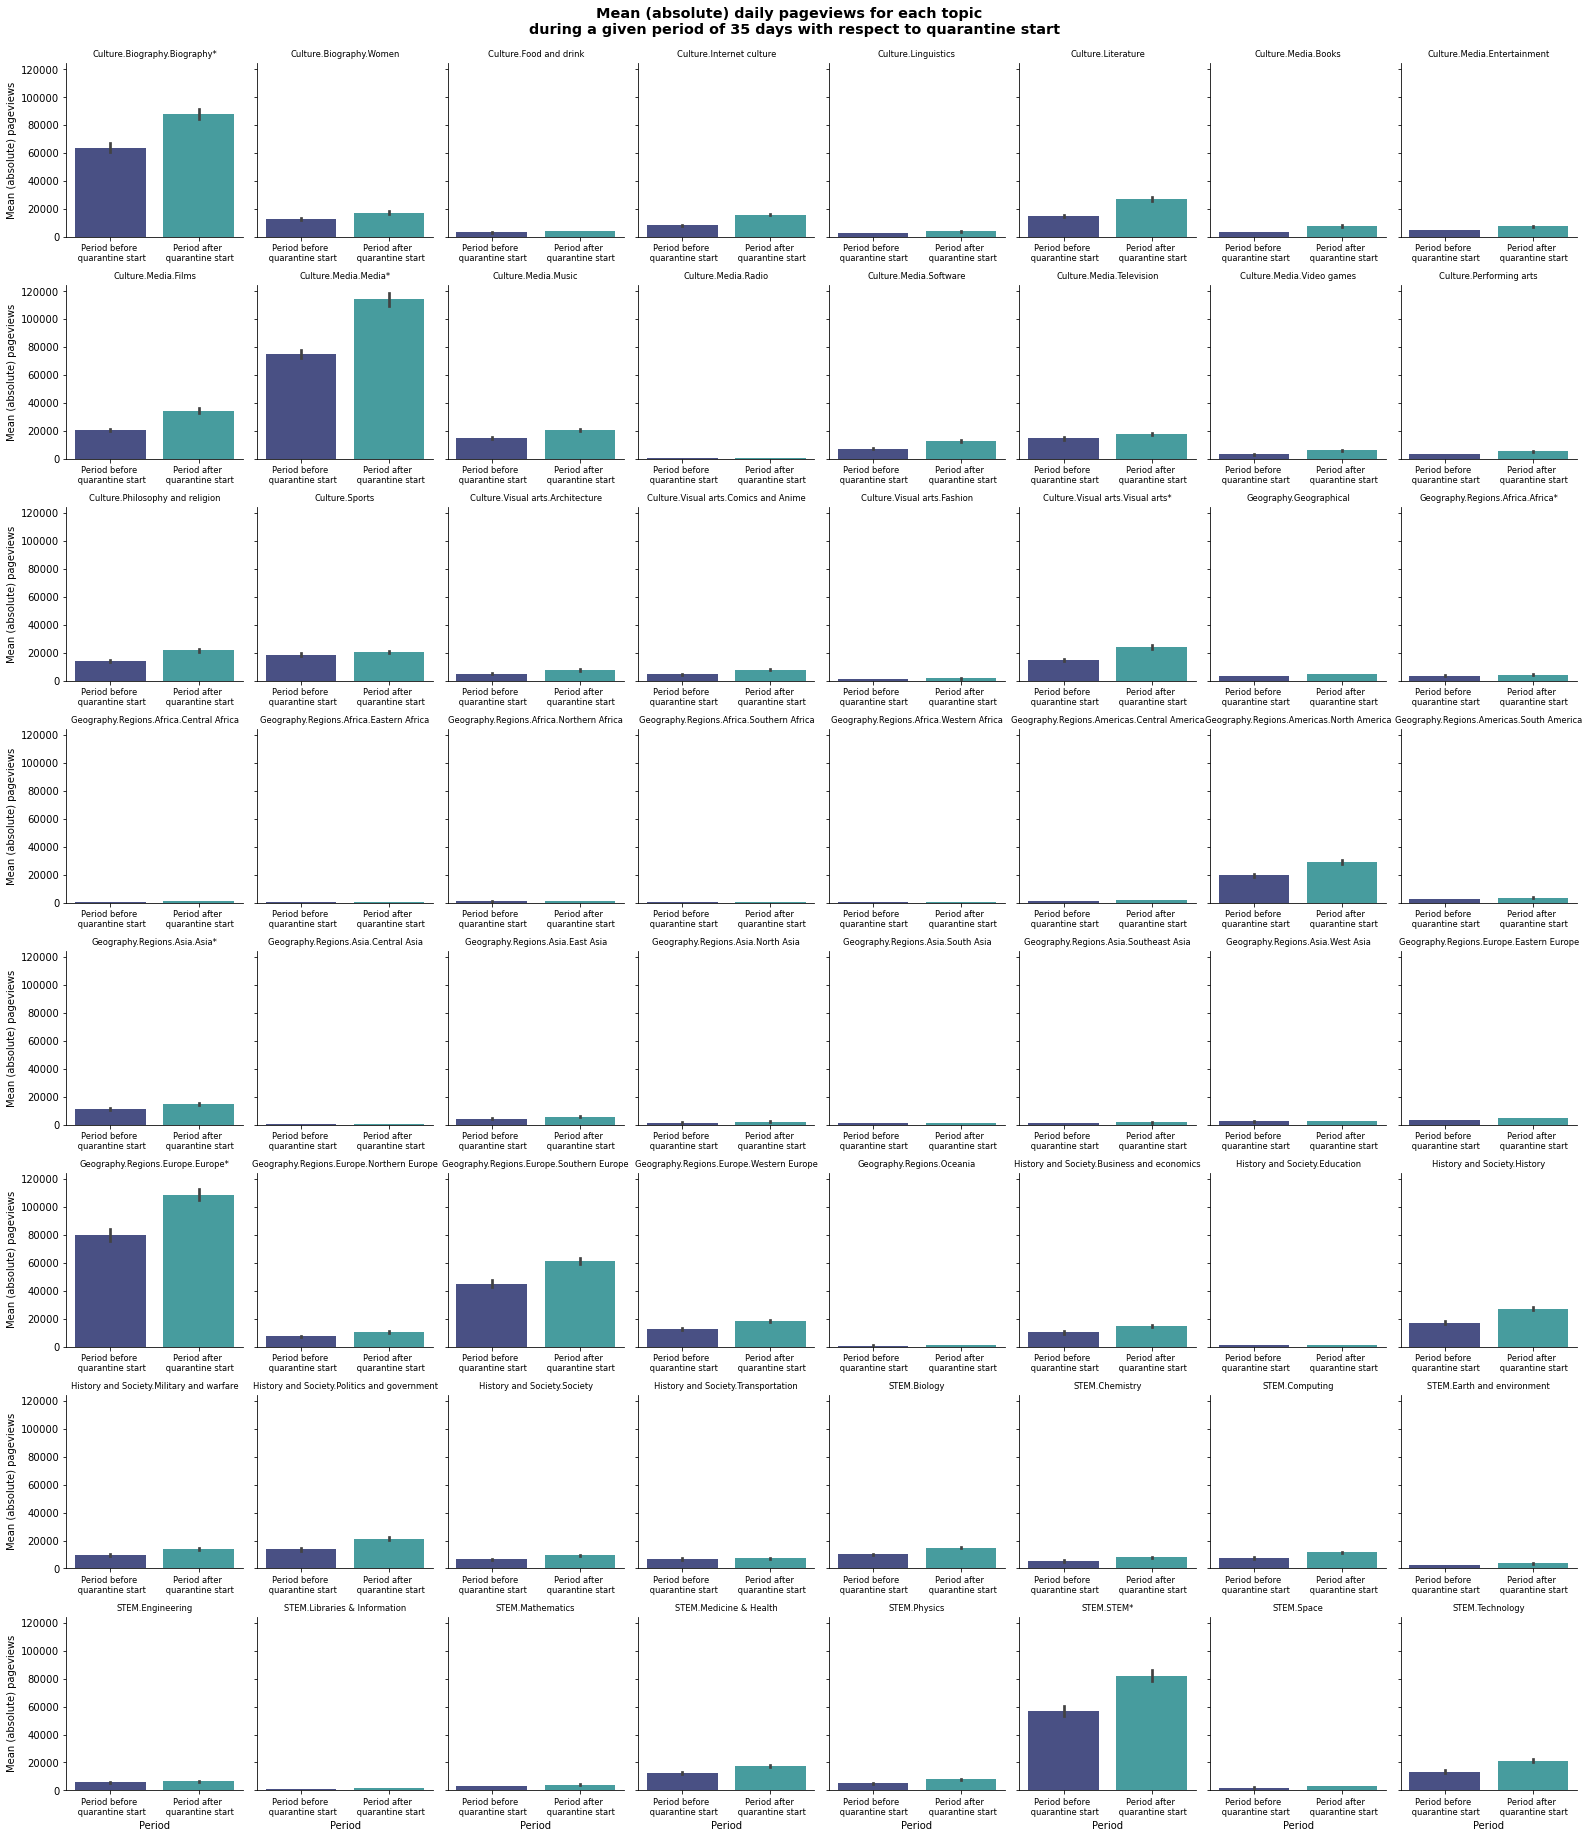

In [20]:
# plot
colors = sns.color_palette(palette="mako", n_colors=2, desat=None, as_cmap=False) #colors palette
grid = sns.catplot(x="period", y="Pageviews", col="Topic", col_wrap = 8, 
                   height = 3.25, aspect=0.85, palette = colors, sharex= False, 
                   ci=95,n_boot=1000, data=df_facetgrid, kind="bar");
grid.set_axis_labels("Period","Mean (absolute) pageviews");
grid.set_xticklabels(["Period before \n quarantine start","Period after \n quarantine start" ],size="small")
grid.set_titles(col_template = "{col_name}",weight=535,size="small");
grid.fig.tight_layout(w_pad=1.1);
plt.subplots_adjust(top=0.95)
grid.fig.suptitle('Mean (absolute) daily pageviews for each topic \n during a given period of 35 days with respect to quarantine start',
                  fontsize='x-large',weight=575);


### **Task 5.3**

Notice that the previous analysis fails to isolate the increases or decreases in each individual topic from the overall increases or decreases in pageviews across Wikipedia in general. That is, it could be that all topics gained/lost pageviews, but some did so more than articles in general, while others did so less than articles in general. To address this issue, you should:


1. Normalize the pageviews counts in the dataframe created in Task 5.1. Instead of using the raw number of pageviews, you should compute, for each day, what fraction of all pageviews a topic received.

2. Create a second visualization that shows not the **raw** value of pageviews before and after, but the **relative** value that you just calculated.

3. **Discuss:** According to Task 5.2, what topics have increased in terms of the raw, absolute number of pageviews after the quarantine started? In relative, rather than absolute, terms, do these findings still hold? If not, what has changed?

---

We add a column which contains the relative pageviews to the dataframe used for the sns.FacetGrid, and repeat the plotting step of 5.2. To calculate the relative pageviews, we first calculate the daily sum of pageviews over each topics and then, we use this new array to calculate the relative pageviews by dividing each topic's pageviews by the total sum for the given day, as following :


<h3 align="center">$\large{\frac{Views_{topick, dayk}}{Total\_views_{dayk}}}$</h3> 

In [21]:
### ~ 5.3.1

# Normalizing the pageviews for the DF created in 5.1
days = list(final_df_melt["Date"].unique())
daily_total_views = [final_df_melt[final_df_melt["Date"]==d]['Pageviews'].sum() for d in days] #list of total views for each day
final_df_melt["fraction_pageviews"] = final_df_melt.apply(lambda x: x["Pageviews"]/daily_total_views[days.index(x["Date"])], axis=1) 

# updating the DF used for FacetGrid in 5.2 with the fraction of pageviews
fractions = pd.concat([(final_df_melt[final_df_melt["Date"].apply(lambda x: (x > daysbefore and x < march9th))]["fraction_pageviews"]),
                       (final_df_melt[final_df_melt["Date"].apply(lambda x: (x >= march9th and x < daysafter))]["fraction_pageviews"])])
fractions.reset_index(drop=True,inplace=True)
df_facetgrid["relative_pageviews"] = fractions

/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


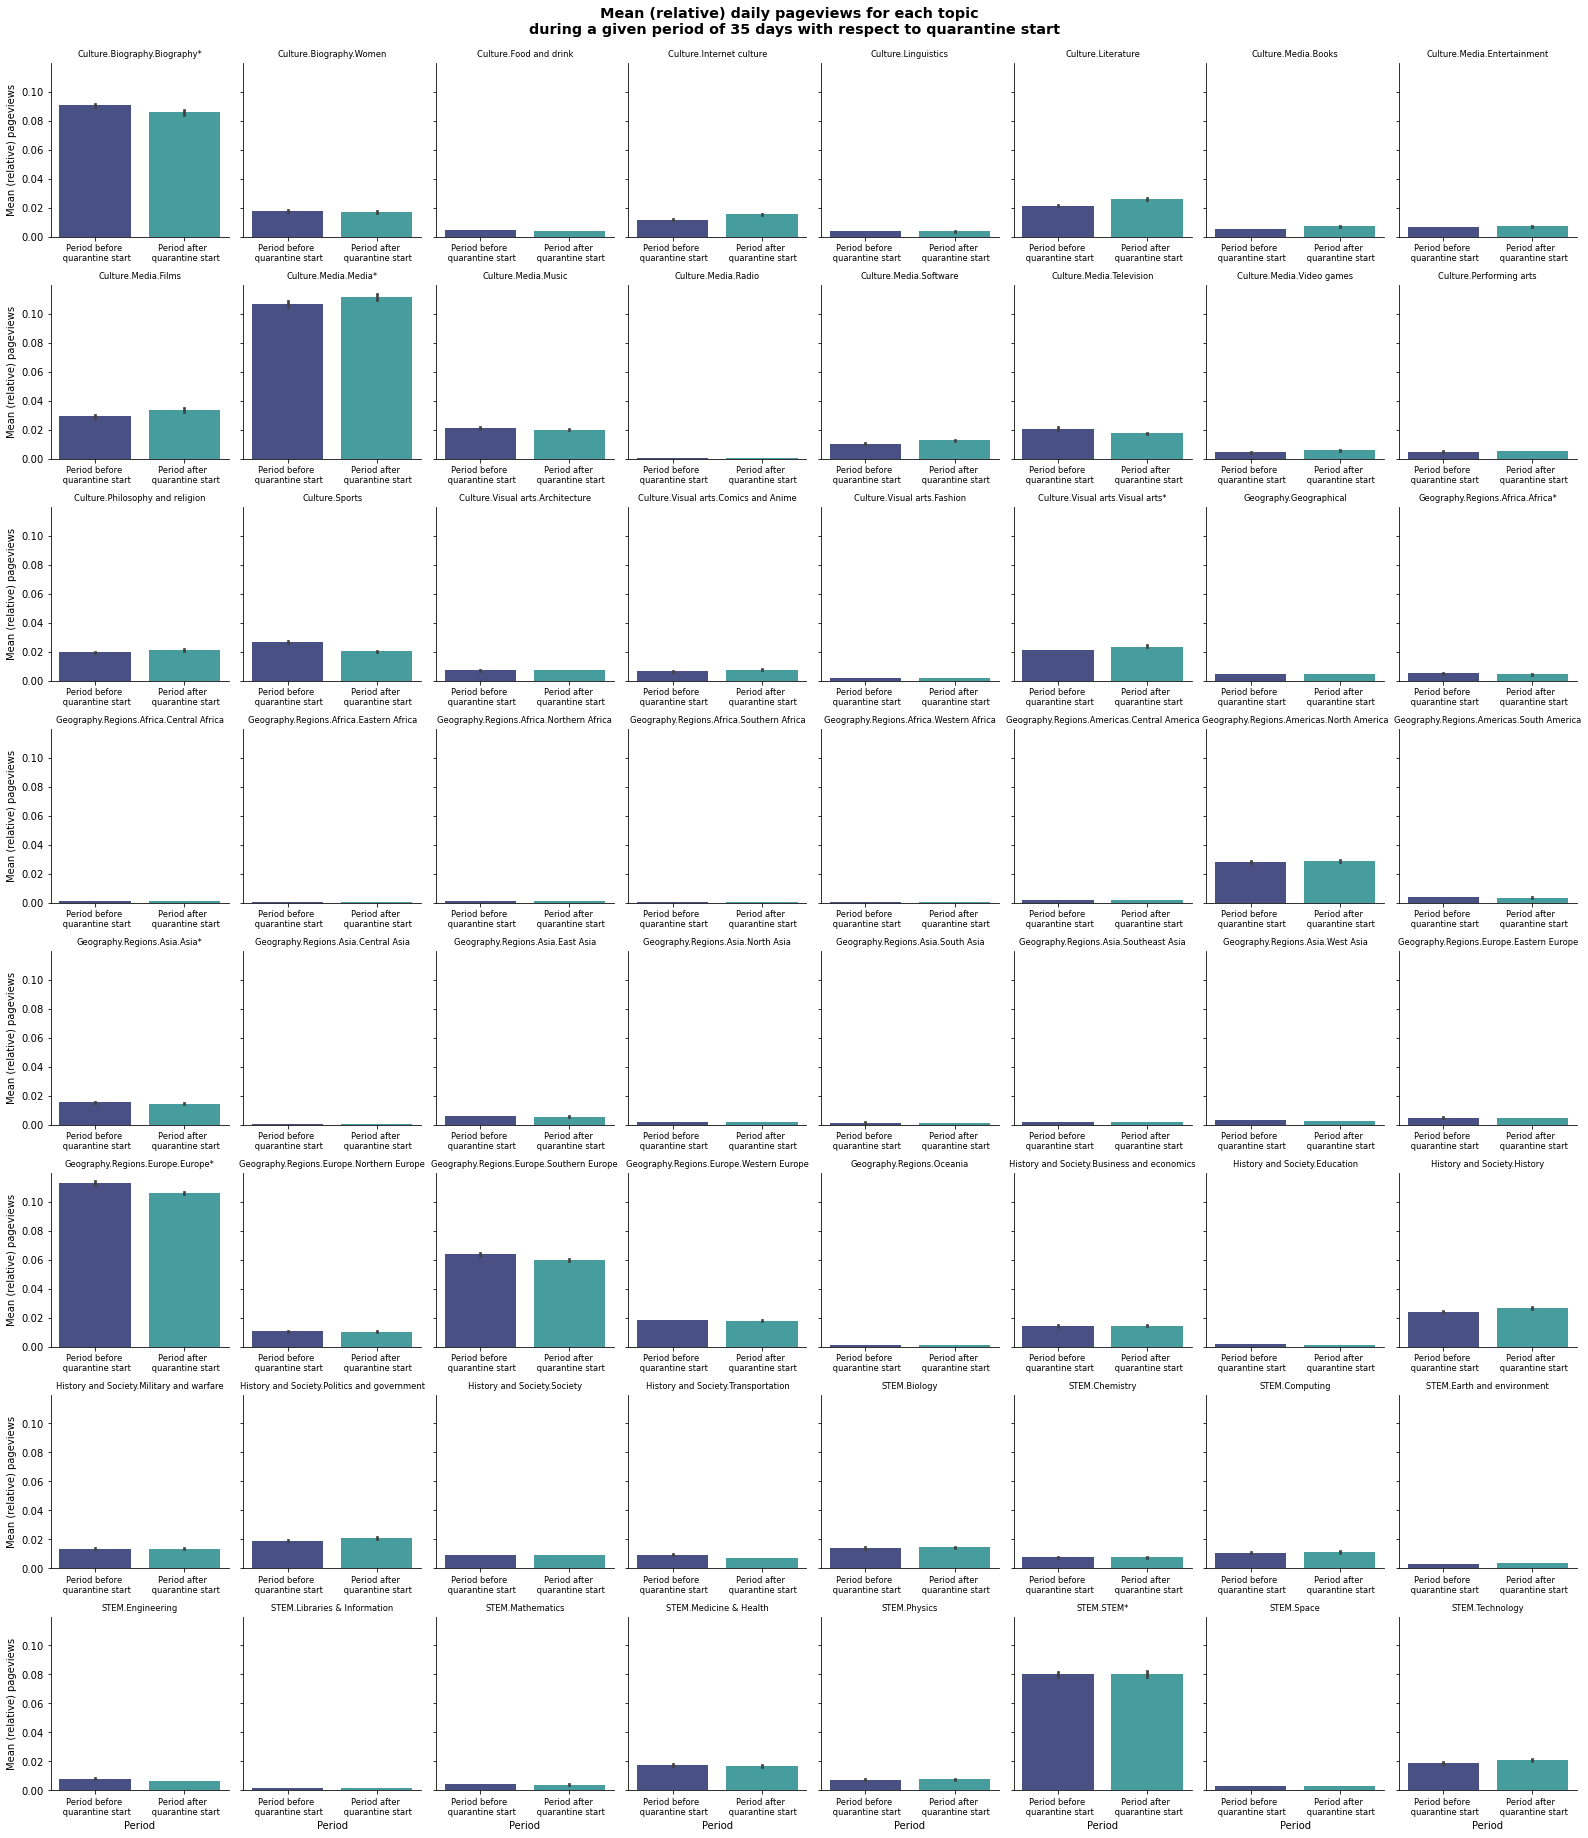

In [22]:
### ~ 5.3.2

#replotting the same graph as 5.2 using the updated columns containing relative pageviews
g_rel = sns.catplot(x="period", y="relative_pageviews",
                col="Topic", col_wrap = 8, height = 3.25, aspect=0.85,
                   palette = colors, sharex= False, ci=95,n_boot=1000,
                data=df_facetgrid, kind="bar");
g_rel.set_axis_labels("Period","Mean (relative) pageviews");
g_rel.set_xticklabels(["Period before \n quarantine start","Period after \n quarantine start" ],size="small")
g_rel.set_titles(col_template = "{col_name}",weight=535,size="small");
g_rel.fig.tight_layout(w_pad=1.1);
plt.subplots_adjust(top=0.95);
g_rel.fig.suptitle('Mean (relative) daily pageviews for each topic \n during a given period of 35 days with respect to quarantine start',
                  fontsize='x-large',weight=575);


### 5.3.3  -  Text Answer

According to 5.2 plot, some topics have an increase in pageviews for the period after the quarantine comparing to the period before, such as Biography, Films, Media, Europe, Southern Europe, STEM, Literature and History topics wheras other have similar values. However when looking at 5.3 plot, showing the mean relatives pagesviews across the same periods, we observe that for all topics, both periods have similar values. We can particularly look at the Biography topic that showed a great increase in the mean number of pageviews after the quarantine but with relative pageviews, values are similar and even a bit larger before march 9th. Then, findings of 5.2 are not holding anymore which shows that we have to be careful in the way we are looking and analyzing data.

---